### Exploring dataset

In [76]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
!pip install -U imbalanced-learn
!pip install scikit-learn xgboost
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


In [77]:
## Load the dataset
churn_data = pd.read_csv("C:/Users/satyajeet/Downloads/Churn Dataset .csv")
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Notice that the dataframe has 21 columns related to customer behavior. 

In [78]:
## Display general information about the dataset
print(churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [79]:
## Check the number of unique values in each column
churn_data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

**Each customer is identified through a unique phone number. There are 19 independent variables used to predict the target feature – customer churn. In this dataset, customer churn is defined as the number of people who stopped being customers. 

In [80]:
## Display basic statistics of numeric columns
churn_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Graphical Representation 

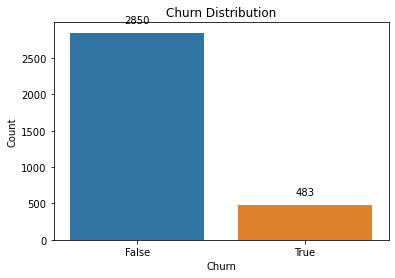

In [40]:
## Create a countplot for the target variable 'Churn' with count annotations
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='churn', data=churn_data)

# Add count annotations to each bar
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='baseline', xytext=(0, 10), textcoords='offset points') for p in ax.patches]

plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

**Only around 483 out of 3333 customers in the dataset have churned. This means that we are dealing with an imbalanced classification problem. We will need to perform some feature engineering to create a balanced training dataset before building the predictive model.

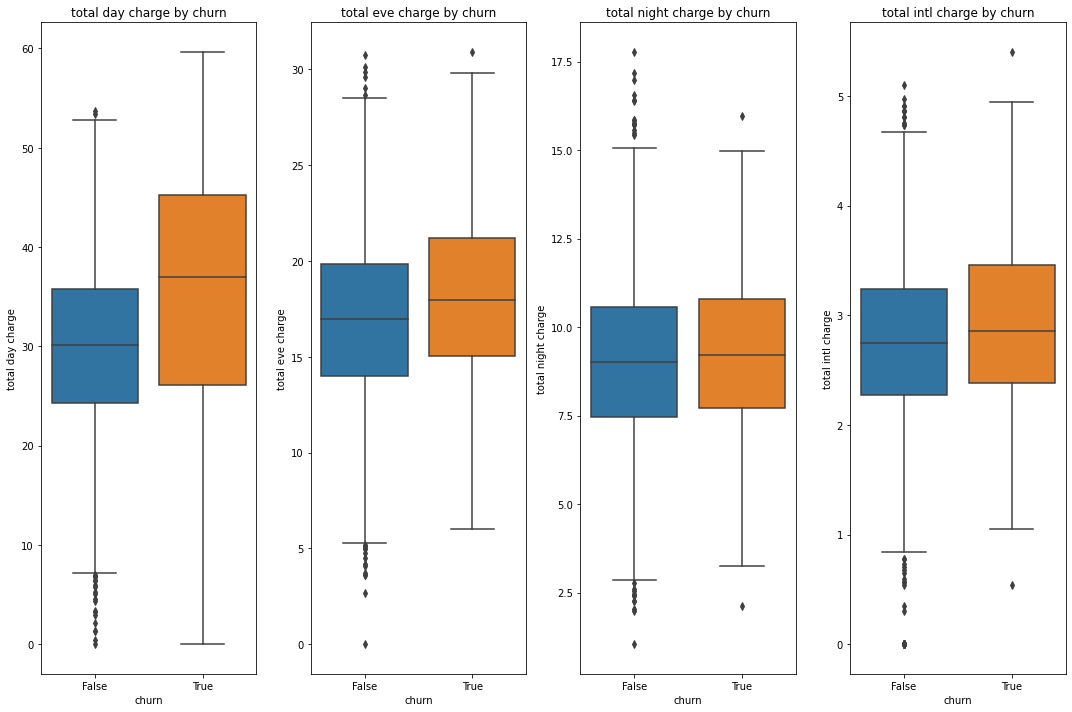

In [41]:
## List of some numeric columns
charge_columns = ['total day charge','total eve charge', 'total night charge', 'total intl charge']

# Create subplots
fig, axes = plt.subplots(1, len(charge_columns), figsize=(15, 10))

# Iterate over charge columns and create boxplots
for i, column in enumerate(charge_columns):
    sns.boxplot(x='churn', y=column, data=churn_data, ax=axes[i])
    axes[i].set_title(f'{column} by churn')

# Adjust layout
plt.tight_layout()
plt.show()

**In the real world, users tend to unsubscribe to their service provider and switch to a different brand if they find the charges too high.
here also it's true, In the box plot of total day charge and total eve charge by churn we can clearly see that Customers who churned have a higher median charge than customers who have not churned.

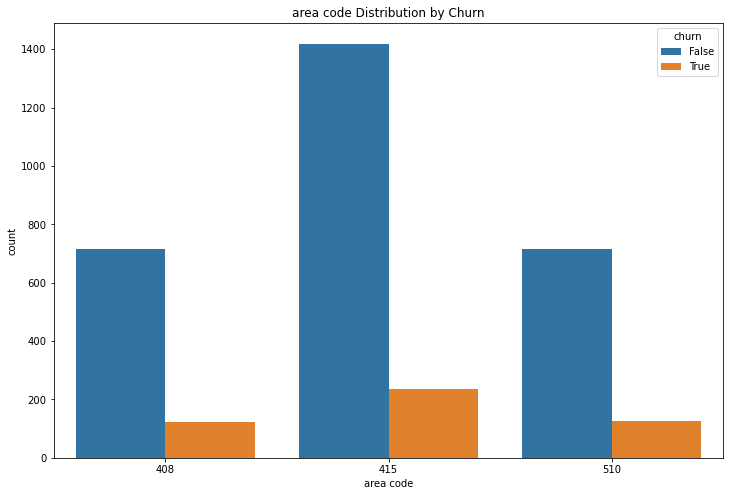

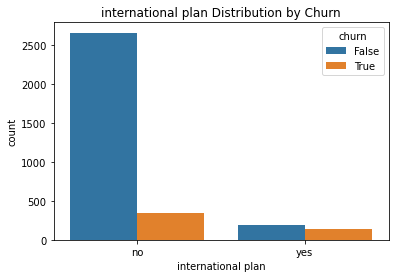

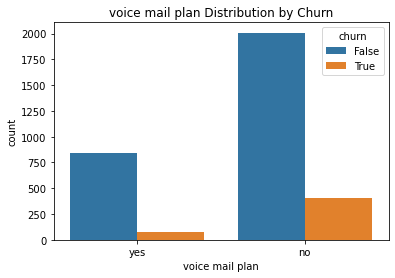

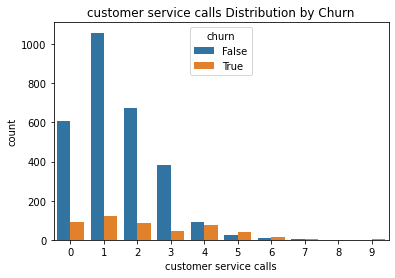

In [25]:
# Explore the distribution of categorical variables 
plt.figure(figsize=(12, 8))  
categorical_columns = [ 'area code', 'international plan', 'voice mail plan','customer service calls']
for column in categorical_columns:
    sns.countplot(x=column, hue='churn', data=churn_data)
    plt.title(f'{column} Distribution by Churn')
    plt.show()
    

**It is clear from the visual above that customers who do not use voice mail plan churn more often than other users. 

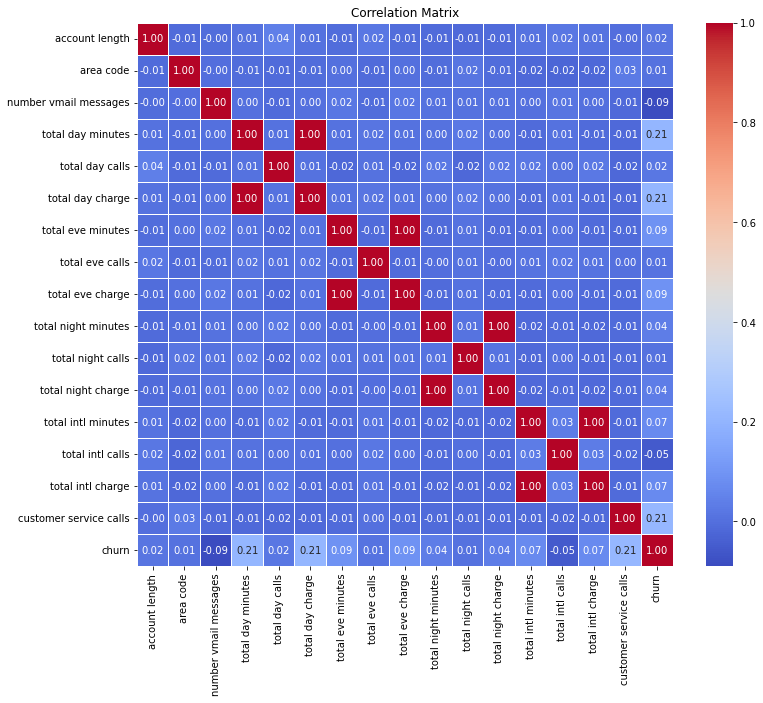

In [11]:
# Explore the correlation between numeric features 
plt.figure(figsize=(12, 10))  # Adjust the size as needed
correlation_matrix = churn_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**In above correlation matrix we can observe that their is a positive relationship between total day minutes and total day charge,total eve minutes and total eve charge,total night minutes and total night charge,total intl minutes and total intl charge. It's obvious because amount charged to a customer effect minutes spent by a customer on call.

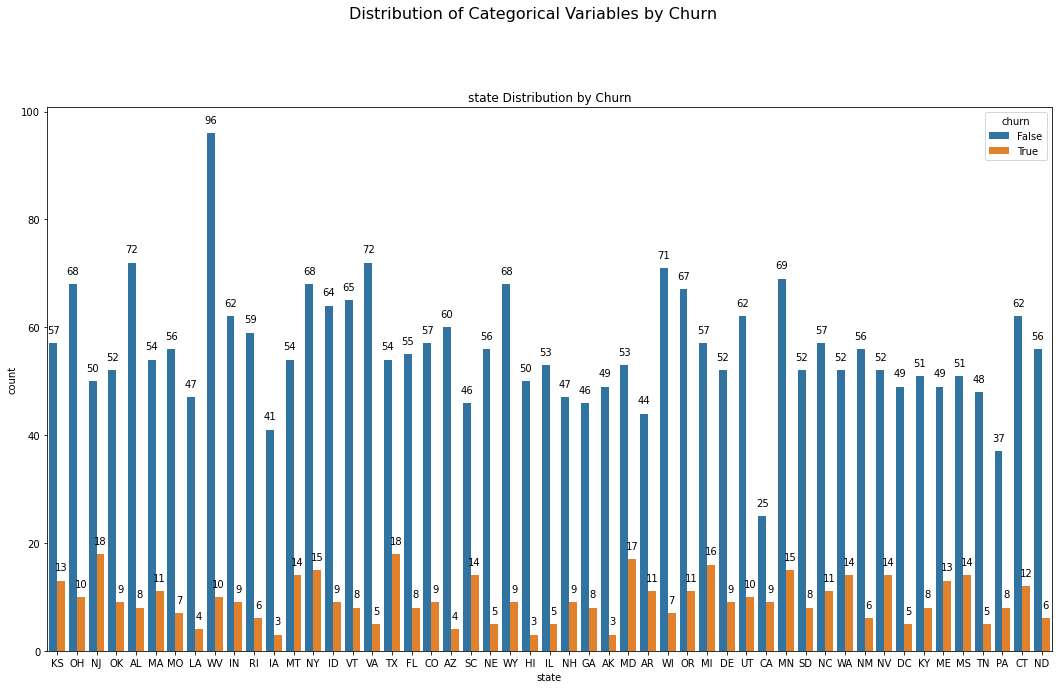

In [20]:
# checking state wise churnung count 
plt.figure(figsize=(18, 10))  
categorical_columns = ['state']  
for column in categorical_columns:
    plt.subplot(1, len(categorical_columns), 1)
    ax = sns.countplot(x=column, hue='churn', data=churn_data)

    # Annotate each bar with the count of churn
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline', xytext=(0, 10), textcoords='offset points')

    plt.title(f'{column} Distribution by Churn')

# Move the title outside the loop
plt.suptitle('Distribution of Categorical Variables by Churn', y=1.02, fontsize=16)
plt.show()


**In above we can see that state vw has high number of customers who have not churned.state IA has low number of customers who has churned. However NJ and TX are the two states with high number of customer churn.

Top 3 states with the maximum number of customer service calls:
   state  sum
49    WV  159
34    NY  142
37    OR  135


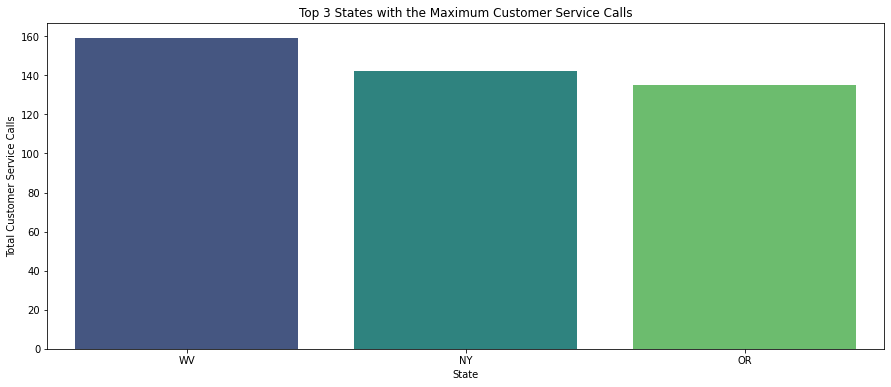

In [34]:
# Group by 'State' and calculate the total number of customer service calls and total count for each state
state_service_calls = churn_data.groupby('state')['customer service calls'].agg(['sum', 'count']).reset_index()

# Find the top 3 states with the maximum number of customer service calls
top_3_states = state_service_calls.nlargest(3, 'sum')

# Print the result
print("Top 3 states with the maximum number of customer service calls:")
print(top_3_states[['state', 'sum']])

# Create a bar plot for visualization
plt.figure(figsize=(15, 6))
sns.barplot(x='state', y='sum', data=top_3_states, palette='viridis')
plt.title('Top 3 States with the Maximum Customer Service Calls')
plt.xlabel('State')
plt.ylabel('Total Customer Service Calls')
plt.show()

**The top three states of customer service calls are WV (159),NY (142),OR (135) respectively.

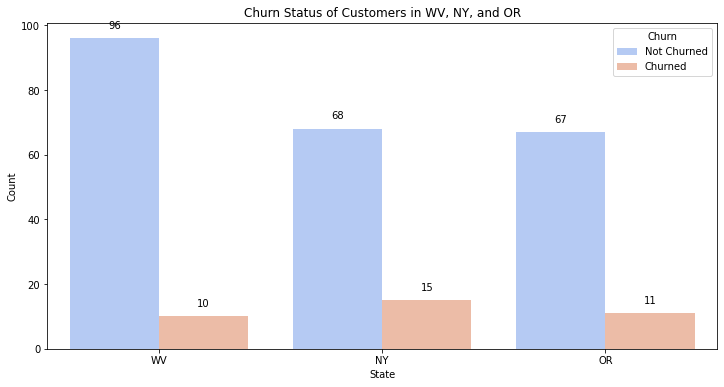

In [36]:
# Select relevant columns
state_list = ['WV', 'NY', 'OR']
churn_data_selected = churn_data[churn_data['state'].isin(state_list)]

# Create a bar plot for the churn status of customers in selected states
plt.figure(figsize=(12, 6))
sns.countplot(x='state', hue='churn', data=churn_data_selected, palette='coolwarm')

# Annotate each bar with the total count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', xytext=(0, 10), textcoords='offset points')

plt.title('Churn Status of Customers in WV, NY, and OR')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

**Above bar plot shows churn status of customers in top three states of customer service calls 

### Preprocessing Data for Customer Churn 

In [87]:
## Outlier detection and treatment
# Select numeric features
num_features_1 = churn_data.drop(['state', 'phone number', 'international plan', 'voice mail plan', 'churn'], axis=1)

# Calculate z-scores for numeric columns
z_scores = zscore(num_features_1)

# Identify outliers using a threshold 
outliers = (abs(z_scores) > 3).any(axis=1)

# Treat outliers by replacing them with the median
median_values = num_features_1.median()
num_features_1[outliers] = num_features_1[outliers].apply(lambda x: median_values if (abs(zscore(x)) > 3).any() else x, axis=1)

num_features_1

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [89]:
x = churn_data[['state','phone number']]
num_features_1 = pd.merge(x,num_features_1, left_index=True, right_index=True)
num_features_1

,state,phone number,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,KS,382-4657,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,371-7191,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,358-1921,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,375-9999,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,330-6626,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,414-4276,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,370-3271,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,328-8230,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,364-6381,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


### Encoding Categorical Variables 

In [90]:
## Selecting categorical features
cat_features = churn_data[['international plan','voice mail plan','churn']]
cat_features.head()

,international plan,voice mail plan,churn
0,no,yes,False
1,no,yes,False
2,no,no,False
3,yes,no,False
4,yes,no,False


In [91]:
## Using labelencoder 
le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,international plan,voice mail plan,churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


In [92]:
## Merging final data set
final_data = pd.merge(num_features_1, df_cat, left_index=True, right_index=True)

In [93]:
final_data.head()

,state,phone number,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan,voice mail plan,churn
0,KS,382-4657,128,415,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,371-7191,107,415,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,358-1921,137,415,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,OH,375-9999,84,408,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,OK,330-6626,75,415,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,1,0,0


In [94]:
final_data.shape

(3333, 21)

### Balancing the data set 

**There are a variety of techniques that can be used to overcome the class imbalance problem in machine learning.
we will use a technique called oversampling. 
This is a process that involves randomly selecting samples from the minority class and adding it to the training dataset.
We are going to oversample the minority class until the number of data points are equal to that of the majority class.

In [95]:
## drop the unnecessory columns
final_data = final_data.drop(['state','phone number'],axis=1)

## split dataset
X = final_data.drop(['churn'],axis=1)
y = final_data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
## oversampling for balancing data
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [97]:
## checking the number of samples in each class to ensure that they are equal
y_train.value_counts()

0    1910
1    1910
Name: churn, dtype: int64

### Model selection for Customer Churn Prediction

**There are various machine learning algorithms that we can use for customer churn prediction as follows, 
1.Random Forest
2.Logistic Regression
3.Support Vector Machines (SVM)
4.Gradient Boosting (XGBoost)
5.K-Nearest Neighbors (KNN)
6.Decision Trees

In [98]:

# Define a dictionary to store evaluation metrics for each model
model_evaluations = {}

# Models to try
models = {
    'Random Forest': RandomForestClassifier(random_state=46),
    'Logistic Regression': LogisticRegression(random_state=46),
    'Support Vector Machine': SVC(random_state=46),
    'XGBoost': XGBClassifier(random_state=46),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=46)
}

# Iterate through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    preds = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)
    conf_matrix = confusion_matrix(y_test, preds)
    
    # Store the evaluation metrics in the dictionary
    model_evaluations[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc,
        'Confusion Matrix': conf_matrix
    }

# Print the evaluation metrics for each model
for model_name, metrics in model_evaluations.items():
    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"ROC AUC Score: {metrics['ROC AUC Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print("-" * 50)

# Suggest the best model based on the evaluation criteria
best_model = max(model_evaluations, key=lambda x: model_evaluations[x]['F1 Score'])
print(f"\nBest Model based on F1 Score: {best_model}")



Evaluation Metrics for Random Forest:
Accuracy: 0.8973
Precision: 0.6478
Recall: 0.6438
F1 Score: 0.6458
ROC AUC Score: 0.7921
Confusion Matrix:
[[884  56]
 [ 57 103]]
--------------------------------------------------

Evaluation Metrics for Logistic Regression:
Accuracy: 0.6782
Precision: 0.2765
Recall: 0.7500
F1 Score: 0.4040
ROC AUC Score: 0.7080
Confusion Matrix:
[[626 314]
 [ 40 120]]
--------------------------------------------------

Evaluation Metrics for Support Vector Machine:
Accuracy: 0.8273
Precision: 0.4235
Recall: 0.5188
F1 Score: 0.4663
ROC AUC Score: 0.6993
Confusion Matrix:
[[827 113]
 [ 77  83]]
--------------------------------------------------

Evaluation Metrics for XGBoost:
Accuracy: 0.9209
Precision: 0.7062
Recall: 0.7812
F1 Score: 0.7418
ROC AUC Score: 0.8630
Confusion Matrix:
[[888  52]
 [ 35 125]]
--------------------------------------------------

Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.6627
Precision: 0.2421
Recall: 0.6188
F1 Score: 0.3480

**Interpretation 
we are going to use XGBoost model.

**Accuracy: 92.09%
This indicates the overall correctness of the model. In this case, 92.09% of the predictions made by the model are correct.

**Precision: 70.62%
Precision measures the accuracy of the positive predictions made by the model. A precision of 70.62% means that out of all instances predicted as positive, 70.62% were true positives, while the remaining 29.38% were false positives.

**Recall (Sensitivity): 78.12%
Recall measures the ability of the model to capture all the positive instances. In this case, 78.12% of the actual positive instances were correctly identified by the model, while 21.88% were missed (false negatives).

**F1 Score: 74.18%
The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, considering both false positives and false negatives. A higher F1 score indicates a better balance between precision and recall.

**ROC AUC Score: 86.30%
The Receiver Operating Characteristic Area Under the Curve (ROC AUC) measures the model's ability to distinguish between the two classes. An ROC AUC of 86.30% is relatively good, indicating a high true positive rate and a low false positive rate.

**The model performs well in terms of accuracy, precision, recall, and F1 score.

**The ROC AUC score suggests that the model is effective in distinguishing between the classes.
